In [165]:
import pandas as pd
df = pd.read_csv("D:/Documenten/Schoolwerk/paraphraser_code/evaluation/qualtrics_two_evaluators_anon.csv")
df = df.drop(columns=df.columns[df.columns.str.contains('Unnamed')])
#exclude information we do not use
exclude_columns = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage']

In [166]:
df.iloc[1:2]

,QID2_1,QID2_2,QID2_3,QID2_4,QID2_5,QID2_6,QID2_7,QID2_8,QID2_9,QID2_10,...,QID284_2,QID284_3,QID284_4,QID284_5,QID284_6,QID284_7,QID284_8,QID284_9,QID284_10,QID284_11
1,4,3,3,3,4,4,2,4,4,2,...,1,2,2,2,2,2,2,2,3,2


In [167]:
#first annotator
#grab first annotator answers
df_first_annotator = df.loc[:, ~df.columns.isin(exclude_columns)].iloc[0:1]
df_first_annotator

grouped = df_first_annotator.groupby(df_first_annotator.columns.str.split('_').str[-1], axis=1)
#['Mbart_v1', 'Mbart_v2'................]
options = ['candidate_mbart_v1','candidate_ul2_v1', 'candidate_mbart_v2', 'candidate_ul2_v2',
       'candidate_mbart_v3', 'candidate_ul2_v3', 'candidate_mbart_v4',
       'candidate_ul2_v4', 'candidate_ul2_v3_late', 'candidate_mbart_v3_late',
       'candidate_mbart_v4_late']

# Sum the values within each group 
summed_dfs = [(options[int(col)-1], grouped.get_group(col).fillna(0).astype(int).sum(numeric_only=True).sum()) for col in grouped.groups]
summed_dfs

[('candidate_mbart_v1', 929),
 ('candidate_mbart_v3_late', 983),
 ('candidate_mbart_v4_late', 999),
 ('candidate_ul2_v1', 985),
 ('candidate_mbart_v2', 983),
 ('candidate_ul2_v2', 1065),
 ('candidate_mbart_v3', 1007),
 ('candidate_ul2_v3', 1035),
 ('candidate_mbart_v4', 1009),
 ('candidate_ul2_v4', 1062),
 ('candidate_ul2_v3_late', 1051)]

In [168]:
#second annotator 
df_2nd_annotator = df.loc[:, ~df.columns.isin(exclude_columns)].iloc[1:2]

grouped_2nd = df_2nd_annotator.groupby(df_2nd_annotator.columns.str.split('_').str[-1], axis=1)
#['Mbart_v1', 'Mbart_v2'................]
options = ['candidate_mbart_v1','candidate_ul2_v1', 'candidate_mbart_v2', 'candidate_ul2_v2',
       'candidate_mbart_v3', 'candidate_ul2_v3', 'candidate_mbart_v4',
       'candidate_ul2_v4', 'candidate_ul2_v3_late', 'candidate_mbart_v3_late',
       'candidate_mbart_v4_late']

# Sum the values within each group 
summed_dfs_2nd = [(options[int(col)-1], grouped_2nd.get_group(col).fillna(0).astype(int).sum(numeric_only=True).sum()) for col in grouped_2nd.groups]
summed_dfs_2nd

[('candidate_mbart_v1', 950),
 ('candidate_mbart_v3_late', 972),
 ('candidate_mbart_v4_late', 981),
 ('candidate_ul2_v1', 1001),
 ('candidate_mbart_v2', 1005),
 ('candidate_ul2_v2', 1089),
 ('candidate_mbart_v3', 1014),
 ('candidate_ul2_v3', 1028),
 ('candidate_mbart_v4', 1020),
 ('candidate_ul2_v4', 1081),
 ('candidate_ul2_v3_late', 1039)]

In [169]:
grouped_2nd.groups.keys() == grouped.groups.keys()

True

In [170]:
from sklearn.metrics import cohen_kappa_score
rater1_ratings = list(df_first_annotator.iloc[0])
rater2_ratings = list(df_2nd_annotator.iloc[0])

kappa = cohen_kappa_score(rater1_ratings, rater2_ratings, weights='quadratic')

print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.5867700641431323


In [171]:
sorted_data_1 = sorted(summed_dfs, key=lambda x: x[1])
# Display the sorted list
print('First annotator')
for item in sorted_data_1:
    print(item[0], item[1]/283)

First annotator
candidate_mbart_v1 3.282685512367491
candidate_mbart_v3_late 3.4734982332155475
candidate_mbart_v2 3.4734982332155475
candidate_ul2_v1 3.480565371024735
candidate_mbart_v4_late 3.530035335689046
candidate_mbart_v3 3.558303886925795
candidate_mbart_v4 3.5653710247349824
candidate_ul2_v3 3.6572438162544167
candidate_ul2_v3_late 3.7137809187279154
candidate_ul2_v4 3.7526501766784452
candidate_ul2_v2 3.7632508833922262


In [172]:
sorted_data_2nd = sorted(summed_dfs_2nd, key=lambda x: x[1])
# Display the sorted list
print('Second annotator')
for item in sorted_data_2nd:
    print(item[0], item[1]/283)

Second annotator
candidate_mbart_v1 3.3568904593639575
candidate_mbart_v3_late 3.4346289752650176
candidate_mbart_v4_late 3.4664310954063606
candidate_ul2_v1 3.537102473498233
candidate_mbart_v2 3.5512367491166077
candidate_mbart_v3 3.5830388692579507
candidate_mbart_v4 3.604240282685512
candidate_ul2_v3 3.6325088339222615
candidate_ul2_v3_late 3.6713780918727914
candidate_ul2_v4 3.8197879858657244
candidate_ul2_v2 3.8480565371024733


Questions with all the same answers removed because these are already correct

In [173]:
#first annotator
unique_prefixes = set(col.split('_')[0] for col in df_first_annotator.columns)
unique_prefixes

# Create a list to store the columns to be removed because they are all the same answer, indicating an answer is already correct
columns_to_remove_1 = []

for prefix in unique_prefixes:
    group = [col for col in df_first_annotator.columns if col.startswith(prefix + "_")]
    #df_first_annotator[group] = df_first_annotator[group].apply(pd.to_numeric, errors='coerce')
    #print(df_first_annotator[group].apply(lambda row: row.nunique() == 1, axis=1).values[0])
    #break
    # Check the standard deviation for the group of columns
    if df_first_annotator[group].apply(lambda row: row.nunique() == 1, axis=1).values[0] == True:
        #print(df_first_annotator[group])
        columns_to_remove_1.extend(group)

In [174]:
#second annotator
unique_prefixes = set(col.split('_')[0] for col in df_2nd_annotator.columns)
unique_prefixes

# Create a list to store the columns to be removed
columns_to_remove_2 = []

for prefix in unique_prefixes:
    group = [col for col in df_2nd_annotator.columns if col.startswith(prefix + "_")]
    #df_first_annotator[group] = df_first_annotator[group].apply(pd.to_numeric, errors='coerce')
    #print(df_first_annotator[group].apply(lambda row: row.nunique() == 1, axis=1).values[0])
    #break
    # Check the standard deviation for the group of columns
    if df_2nd_annotator[group].apply(lambda row: row.nunique() == 1, axis=1).values[0] == True:
        #print(df_first_annotator[group])
        columns_to_remove_2.extend(group)

In [175]:
common_columns_to_remove = list(set(columns_to_remove_1).intersection(columns_to_remove_2))
len(common_columns_to_remove)/11

49.0

In [176]:
#first annotator
df_no_identical_1 = df_first_annotator.drop(columns=common_columns_to_remove)
grouped = df_no_identical_1.groupby(df_no_identical_1.columns.str.split('_').str[-1], axis=1)

options = ['candidate_mbart_v1','candidate_ul2_v1', 'candidate_mbart_v2', 'candidate_ul2_v2',
       'candidate_mbart_v3', 'candidate_ul2_v3', 'candidate_mbart_v4',
       'candidate_ul2_v4', 'candidate_ul2_v3_late', 'candidate_mbart_v3_late',
       'candidate_mbart_v4_late']

# Sum the values within each group 
summed_dfs_ni_1 = [(options[int(col)-1], grouped.get_group(col).fillna(0).astype(int).sum(numeric_only=True).sum()) for col in grouped.groups]

sorted_data_ni_1 = sorted(summed_dfs_ni_1, key=lambda x: x[1])
cr = len(common_columns_to_remove)/11
print('First annotator')
# Display the sorted list
for item in sorted_data_ni_1:
    print(item[0], item[1]/(283-cr))

First annotator
candidate_mbart_v1 3.0256410256410255
candidate_mbart_v3_late 3.2564102564102564
candidate_mbart_v2 3.2564102564102564
candidate_ul2_v1 3.264957264957265
candidate_mbart_v4_late 3.324786324786325
candidate_mbart_v3 3.358974358974359
candidate_mbart_v4 3.3675213675213675
candidate_ul2_v3 3.4786324786324787
candidate_ul2_v3_late 3.547008547008547
candidate_ul2_v4 3.594017094017094
candidate_ul2_v2 3.606837606837607


In [177]:
#second annotator
df_no_identical_2 = df_2nd_annotator.drop(columns=common_columns_to_remove)
grouped = df_no_identical_2.groupby(df_no_identical_2.columns.str.split('_').str[-1], axis=1)

# Sum the values within each group 
summed_dfs_ni_2 = [(options[int(col)-1], grouped.get_group(col).fillna(0).astype(int).sum(numeric_only=True).sum()) for col in grouped.groups]

sorted_data_ni_2 = sorted(summed_dfs_ni_2, key=lambda x: x[1])
cr = len(common_columns_to_remove)/11
print('Second annotator')
# Display the sorted list
for item in sorted_data_ni_2:
    print(item[0], item[1]/(283-cr))

Second annotator
candidate_mbart_v1 3.0555555555555554
candidate_mbart_v3_late 3.1495726495726495
candidate_mbart_v4_late 3.1880341880341883
candidate_ul2_v1 3.2735042735042734
candidate_mbart_v2 3.2905982905982905
candidate_mbart_v3 3.3290598290598292
candidate_mbart_v4 3.3547008547008548
candidate_ul2_v3 3.388888888888889
candidate_ul2_v3_late 3.4358974358974357
candidate_ul2_v4 3.6153846153846154
candidate_ul2_v2 3.6495726495726495


In [178]:
from sklearn.metrics import cohen_kappa_score
rater1_ratings = list(df_no_identical_1.iloc[0])
rater2_ratings = list(df_no_identical_2.iloc[0])

kappa = cohen_kappa_score(rater1_ratings, rater2_ratings, weights='quadratic')

print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.5397041119559087


In [179]:
len(rater1_ratings)

2574

In [180]:
#Graph order
result_dict = {}

# Update the dictionary with values from list1
for key, value in sorted_data_ni_1:
    result_dict[key] = result_dict.get(key, 0) + value

# Update the dictionary with values from list2
for key, value in sorted_data_ni_2:
    result_dict[key] = result_dict.get(key, 0) + value

# Convert the dictionary back to a list of tuples
result_list = list(result_dict.items())

In [183]:
sorted_result_list

[('candidate_ul2_v2', 1698),
 ('candidate_ul2_v4', 1687),
 ('candidate_ul2_v3_late', 1634),
 ('candidate_ul2_v3', 1607),
 ('candidate_mbart_v4', 1573),
 ('candidate_mbart_v3', 1565),
 ('candidate_mbart_v2', 1532),
 ('candidate_ul2_v1', 1530),
 ('candidate_mbart_v4_late', 1524),
 ('candidate_mbart_v3_late', 1499),
 ('candidate_mbart_v1', 1423)]

In [193]:
categories

['candidate_mbart_v1',
 'candidate_mbart_v3_late',
 'candidate_mbart_v4_late',
 'candidate_ul2_v1',
 'candidate_mbart_v2',
 'candidate_mbart_v3',
 'candidate_mbart_v4',
 'candidate_ul2_v3',
 'candidate_ul2_v3_late',
 'candidate_ul2_v4',
 'candidate_ul2_v2']

In [195]:
sorted_data_ni_1

[('candidate_mbart_v1', 708),
 ('candidate_mbart_v3_late', 762),
 ('candidate_mbart_v2', 762),
 ('candidate_ul2_v1', 764),
 ('candidate_mbart_v4_late', 778),
 ('candidate_mbart_v3', 786),
 ('candidate_mbart_v4', 788),
 ('candidate_ul2_v3', 814),
 ('candidate_ul2_v3_late', 830),
 ('candidate_ul2_v4', 841),
 ('candidate_ul2_v2', 844)]

In [203]:
order_annotator_2

[('candidate_mbart_v1', 715),
 ('candidate_mbart_v3_late', 737),
 ('candidate_mbart_v4_late', 746),
 ('candidate_ul2_v1', 766),
 ('candidate_mbart_v2', 770),
 ('candidate_mbart_v3', 779),
 ('candidate_mbart_v4', 785),
 ('candidate_ul2_v3', 793),
 ('candidate_ul2_v3_late', 804),
 ('candidate_ul2_v4', 846),
 ('candidate_ul2_v2', 854)]

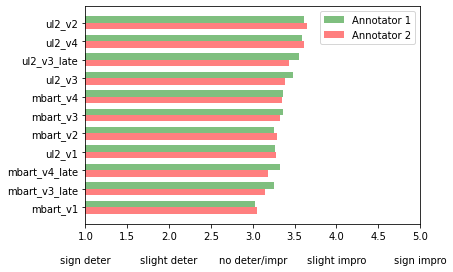

In [207]:
import matplotlib.pyplot as plt
import numpy as np
#.replace("candidate_", "")
# Data

cr = len(common_columns_to_remove) / 11
sorted_result_list = sorted(result_list, key=lambda x: x[1], reverse=False)
categories = [item[0] for item in sorted_result_list]

order_annotator_1 = sorted(sorted_data_ni_1, key=lambda x: categories.index(x[0]))
order_annotator_2 = sorted(sorted_data_ni_2, key=lambda x: categories.index(x[0]))

values_annotator_1 = [item[1] / (283 - cr) for item in order_annotator_1]
values_annotator_2 = [item[1] / (283 - cr) for item in order_annotator_2]

categories = [item[0].replace("candidate_", "") for item in sorted_result_list]
#sorted_list = sorted(sorted_data_ni_2, key=lambda x: [t[0] for t in sorted_data_ni_2].index(x[0]))
#values_annotator_2 = [item[1] / (283 - cr) for item in sorted_list]

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for each category
indices = np.arange(len(categories))

# Create a horizontal bar chart with adjusted x-coordinates
plt.barh(indices + bar_width/2, values_annotator_1, height=bar_width, color='green', alpha=0.5, label='Annotator 1')
plt.barh(indices - bar_width/2, values_annotator_2, height=bar_width, color='red', alpha=0.5, label='Annotator 2')
x_ticks_with_text = [1,2,3,4,5]
x_labels = ['sign deter', 'slight deter', 'no deter/impr', 'slight impro', 'sign impro']
# Write text under specified x-ticks
for i, x_tick in enumerate(x_ticks_with_text):
    plt.text(x_tick, -3, f'{x_labels[i]}', ha='center')
# Set the x-axis limits to match the scale (from 0 to 1)
plt.xlim(1, 5)

# Set labels and title
#plt.xlabel('Rating')
#plt.title("Average rating 283 sentences per model")
plt.yticks(indices, categories)  # Set y-axis ticks to category labels
plt.legend()

# Show the chart
plt.show()


GPT VS MC4

In [208]:
import pandas as pd
df = pd.read_csv("D:/Documenten/Schoolwerk/paraphraser_code/evaluation/MC4_VS_GPT_anon.csv")
df = df.drop(columns=df.columns[df.columns.str.contains('Unnamed')])
exclude_columns = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage']

df.loc[:, ~df.columns.isin(exclude_columns)].iloc[0:2]

,QID318_1,QID318_2,QID319_1,QID319_2,QID320_1,QID320_2,QID321_1,QID321_2,QID322_1,QID322_2,...,QID462_1,QID462_2,QID463_1,QID463_2,QID464_1,QID464_2,QID465_1,QID465_2,QID466_1,QID466_2
0,4,2,5,3,4,3,4,3,4,4,...,4,3,2,2,3,2,4,3,2,4
1,3,4,4,3,5,3,4,3,5,3,...,4,3,2,4,2,1,3,3,2,4


In [209]:
#grab first annotator answers
df_first_annotator = df.loc[:, ~df.columns.isin(exclude_columns)].iloc[0:1]
df_first_annotator

,QID318_1,QID318_2,QID319_1,QID319_2,QID320_1,QID320_2,QID321_1,QID321_2,QID322_1,QID322_2,...,QID462_1,QID462_2,QID463_1,QID463_2,QID464_1,QID464_2,QID465_1,QID465_2,QID466_1,QID466_2
0,4,2,5,3,4,3,4,3,4,4,...,4,3,2,2,3,2,4,3,2,4


In [210]:
#first annotator
grouped = df_first_annotator.groupby(df_first_annotator.columns.str.split('_').str[-1], axis=1)
#['Mbart_v1', 'Mbart_v2'................]
options = ['candidate_ul2_v2', 'candidate_ul2_mc4']

# Sum the values within each group 
summed_dfs = [(options[int(col)-1], grouped.get_group(col).fillna(0).astype(int).sum(numeric_only=True).sum()) for col in grouped.groups]
summed_dfs

[('candidate_ul2_v2', 520), ('candidate_ul2_mc4', 476)]

In [211]:
#second annotator 
df_2nd_annotator = df.loc[:, ~df.columns.isin(exclude_columns)].iloc[1:2]

grouped_2nd = df_2nd_annotator.groupby(df_2nd_annotator.columns.str.split('_').str[-1], axis=1)

# Sum the values within each group 
summed_dfs_2nd = [(options[int(col)-1], grouped_2nd.get_group(col).fillna(0).astype(int).sum(numeric_only=True).sum()) for col in grouped_2nd.groups]
summed_dfs_2nd

[('candidate_ul2_v2', 540), ('candidate_ul2_mc4', 485)]

In [212]:
grouped_2nd.groups.keys() == grouped.groups.keys()

True

In [213]:
from sklearn.metrics import cohen_kappa_score
rater1_ratings = list(df_first_annotator.iloc[0])
rater2_ratings = list(df_2nd_annotator.iloc[0])

kappa = cohen_kappa_score(rater1_ratings, rater2_ratings, weights='quadratic')

print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.6533564570026649


In [214]:
len(rater1_ratings)

298

In [215]:
sorted_data_1 = sorted(summed_dfs, key=lambda x: x[1])
# Display the sorted list
print('First annotator')
for item in sorted_data_1:
    print(item[0], item[1]/149)

sorted_data_2nd = sorted(summed_dfs_2nd, key=lambda x: x[1])
# Display the sorted list
print('Second annotator')
for item in sorted_data_2nd:
    print(item[0], item[1]/149)

First annotator
candidate_ul2_mc4 3.1946308724832213
candidate_ul2_v2 3.48993288590604
Second annotator
candidate_ul2_mc4 3.2550335570469797
candidate_ul2_v2 3.6241610738255035


In [216]:
#first annotator
unique_prefixes = set(col.split('_')[0] for col in df_first_annotator.columns)
unique_prefixes

# Create a list to store the columns to be removed because they are all the same answer, indicating an answer is already correct
columns_to_remove_1 = []

for prefix in unique_prefixes:
    group = [col for col in df_first_annotator.columns if col.startswith(prefix + "_")]
    #df_first_annotator[group] = df_first_annotator[group].apply(pd.to_numeric, errors='coerce')
    #print(df_first_annotator[group].apply(lambda row: row.nunique() == 1, axis=1).values[0])
    #break
    # Check the standard deviation for the group of columns
    if df_first_annotator[group].apply(lambda row: row.nunique() == 1, axis=1).values[0] == True:
        #print(df_first_annotator[group])
        columns_to_remove_1.extend(group)

#second annotator
unique_prefixes = set(col.split('_')[0] for col in df_2nd_annotator.columns)
unique_prefixes

# Create a list to store the columns to be removed
columns_to_remove_2 = []

for prefix in unique_prefixes:
    group = [col for col in df_2nd_annotator.columns if col.startswith(prefix + "_")]
    #df_first_annotator[group] = df_first_annotator[group].apply(pd.to_numeric, errors='coerce')
    #print(df_first_annotator[group].apply(lambda row: row.nunique() == 1, axis=1).values[0])
    #break
    # Check the standard deviation for the group of columns
    if df_2nd_annotator[group].apply(lambda row: row.nunique() == 1, axis=1).values[0] == True:
        #print(df_first_annotator[group])
        columns_to_remove_2.extend(group)

In [217]:
common_columns_to_remove = list(set(columns_to_remove_1).intersection(columns_to_remove_2))
len(common_columns_to_remove)/11

#first annotator
df_no_identical_1 = df_first_annotator.drop(columns=common_columns_to_remove)
grouped = df_no_identical_1.groupby(df_no_identical_1.columns.str.split('_').str[-1], axis=1)
#['Mbart_v1', 'Mbart_v2'................]

# Sum the values within each group 
summed_dfs_ni_1 = [(options[int(col)-1], grouped.get_group(col).fillna(0).astype(int).sum(numeric_only=True).sum()) for col in grouped.groups]

sorted_data_2 = sorted(summed_dfs_ni_1, key=lambda x: x[1])
cr = len(common_columns_to_remove)/2
print('First annotator')
# Display the sorted list
for item in sorted_data_2:
    print(item[0], item[1]/(149-cr))

#second annotator
df_no_identical_2 = df_2nd_annotator.drop(columns=common_columns_to_remove)
grouped = df_no_identical_2.groupby(df_no_identical_2.columns.str.split('_').str[-1], axis=1)
#['Mbart_v1', 'Mbart_v2'................]

# Sum the values within each group 
summed_dfs_ni_2 = [(options[int(col)-1], grouped.get_group(col).fillna(0).astype(int).sum(numeric_only=True).sum()) for col in grouped.groups]

sorted_data_3 = sorted(summed_dfs_ni_2, key=lambda x: x[1])
cr = len(common_columns_to_remove)/2
print(' ')
print('Second annotator')
# Display the sorted list
for item in sorted_data_3:
    print(item[0], item[1]/(149-cr))

First annotator
candidate_ul2_mc4 3.25
candidate_ul2_v2 3.573529411764706
 
Second annotator
candidate_ul2_mc4 3.323529411764706
candidate_ul2_v2 3.7279411764705883


In [218]:
from sklearn.metrics import cohen_kappa_score
rater1_ratings = list(df_no_identical_1.iloc[0])
rater2_ratings = list(df_no_identical_2.iloc[0])

kappa = cohen_kappa_score(rater1_ratings, rater2_ratings, weights='quadratic')

print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.6724009593912827


In [225]:
len(rater1_ratings)/2

136.0

0 1
1 2
2 3
3 4
4 5


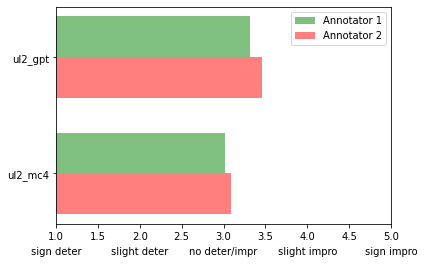

In [223]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['ul2_mc4', 'ul2_gpt']
values_annotator_1 = [item[1] / (149 - cr) for item in sorted_data_2]
sorted_list = sorted(sorted_data_3, key=lambda x: [t[0] for t in sorted_data_2].index(x[0]))
values_annotator_2 = [item[1] / (149 - cr) for item in sorted_list]

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for each category
indices = np.arange(len(categories))

# Create a horizontal bar chart with adjusted x-coordinates
plt.barh(indices + bar_width/2, values_annotator_1, height=bar_width, color='green', alpha=0.5, label='Annotator 1')
plt.barh(indices - bar_width/2, values_annotator_2, height=bar_width, color='red', alpha=0.5, label='Annotator 2')

x_ticks_with_text = [1,2,3,4,5]
x_labels = ['sign deter', 'slight deter', 'no deter/impr', 'slight impro', 'sign impro']
# Write text under specified x-ticks
for i, x_tick in enumerate(x_ticks_with_text):
    print(i, x_tick)
    plt.text(x_tick, -0.7, f'{x_labels[i]}', ha='center')
    
# Set the x-axis limits to match the scale (from 0 to 1)
plt.xlim(1, 5)

# Set labels and title
#plt.xlabel('Rating')
#plt.title("Average rating 283 sentences per model")
plt.yticks(indices, categories)  # Set y-axis ticks to category labels
plt.legend()

# Show the chart
plt.show()


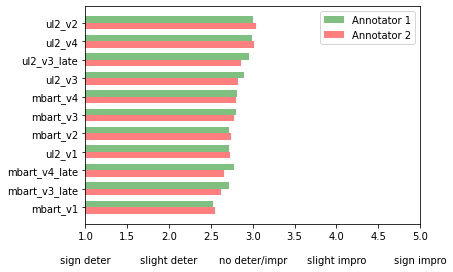

In [220]:
import matplotlib.pyplot as plt
import numpy as np
#.replace("candidate_", "")
# Data

cr = len(common_columns_to_remove) / 11
sorted_result_list = sorted(result_list, key=lambda x: x[1], reverse=False)
categories = [item[0] for item in sorted_result_list]

order_annotator_1 = sorted(sorted_data_ni_1, key=lambda x: categories.index(x[0]))
order_annotator_2 = sorted(sorted_data_ni_2, key=lambda x: categories.index(x[0]))

values_annotator_1 = [item[1] / (283 - cr) for item in order_annotator_1]
values_annotator_2 = [item[1] / (283 - cr) for item in order_annotator_2]

categories = [item[0].replace("candidate_", "") for item in sorted_result_list]
#sorted_list = sorted(sorted_data_ni_2, key=lambda x: [t[0] for t in sorted_data_ni_2].index(x[0]))
#values_annotator_2 = [item[1] / (283 - cr) for item in sorted_list]

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for each category
indices = np.arange(len(categories))

# Create a horizontal bar chart with adjusted x-coordinates
plt.barh(indices + bar_width/2, values_annotator_1, height=bar_width, color='green', alpha=0.5, label='Annotator 1')
plt.barh(indices - bar_width/2, values_annotator_2, height=bar_width, color='red', alpha=0.5, label='Annotator 2')
x_ticks_with_text = [1,2,3,4,5]
x_labels = ['sign deter', 'slight deter', 'no deter/impr', 'slight impro', 'sign impro']
# Write text under specified x-ticks
for i, x_tick in enumerate(x_ticks_with_text):
    plt.text(x_tick, -3, f'{x_labels[i]}', ha='center')
# Set the x-axis limits to match the scale (from 0 to 1)
plt.xlim(1, 5)

# Set labels and title
#plt.xlabel('Rating')
#plt.title("Average rating 283 sentences per model")
plt.yticks(indices, categories)  # Set y-axis ticks to category labels
plt.legend()

# Show the chart
plt.show()

ABANDONED METHOD BELOW


In [43]:
#ABANDONED 100 sentences for human evaluation
#highest variance. Grab all models with 5 different ratings and 4 different ratings and a sample of 3 different ratings.
unique_prefixes = set(col.split('_')[0] for col in df_first_annotator.columns)
unique_prefixes

# Create a list to store the columns to be removed
columns_five = []

for prefix in unique_prefixes:
    group = [col for col in df_first_annotator if col.startswith(prefix + "_")]
    #df_first_annotator[group] = df_first_annotator[group].apply(pd.to_numeric, errors='coerce')
    #print(df_first_annotator[group].apply(lambda row: row.nunique() == 1, axis=1).values[0])
    #break
    #for i in range(3):
    #    print(i+3)
    if df_first_annotator[group].apply(lambda row: row.nunique() == 3, axis=1).values[0] == True:
            #print(df_first_annotator[group])
            #print(group)
            #break
        columns_five.extend(group)

# Remove columns with the same value
len(columns_five)/11
#df = df.drop(columns=columns_to_remove)

86.0

In [37]:
all_indexes = []

In [40]:
import re
result_list = [re.search(r'QID(\d+)_', item).group(1) for item in columns_five]
all_indexes.extend(list(set(result_list)))
len(all_indexes)

56

In [44]:
import random
#3
result_list = [re.search(r'QID(\d+)_', item).group(1) for item in columns_five]
random_selection = random.sample(list(set(result_list)), 44)
all_indexes.extend(random_selection)

In [45]:
#make it 100 by adding nunique 5, 4 and sample of 3
len(all_indexes)

100

In [46]:
import random
actual_indexes = [int(index)-2 for index in all_indexes]
random.shuffle(actual_indexes)

In [48]:
df_2nd_annotator = pd.read_csv("E:\Data_exploration\GitHub\paraphraser_code\data\candidates\candidates_annotated_sentences.csv")
#df_2nd_annotator.iloc[actual_indexes]

In [94]:
#df_2nd_annotator.iloc[actual_indexes].to_csv('E:/Data_exploration/Floris_training/paraphraser_data/benchmarks/100_sentences_selection.csv', index=False)